In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GPT-2

In [ ]:
import pickle
import numpy as np

def direction_aware_percentile_to_percentile_distance_gpt2(n_epochs):
  # Path to the pickle file in Google Drive
  directory_path = '/content/drive/My Drive/gpt2_perplexity_ratios'
  file_path = directory_path + '/perplexity_ratios__' + str(n_epochs) +  '_epochs.pkl'

  # Load the lists from the pickle file
  with open(file_path, 'rb') as f:
      stereotyping_demeaning__perplexity_ratios, nonstereotyping_nondemeaning__perplexity_ratios = pickle.load(f)

  mean_stereotyping_demeaning__perplexity_ratios = np.mean(stereotyping_demeaning__perplexity_ratios)
  mean_nonstereotyping_nondemeaning__perplexity_ratios = np.mean(nonstereotyping_nondemeaning__perplexity_ratios)

  mean = np.mean([mean_stereotyping_demeaning__perplexity_ratios, mean_nonstereotyping_nondemeaning__perplexity_ratios])
  print('mean:', mean)

  # Define the percentiles
  percentiles = list(range(5, 96, 1)) #exclude top and bottom 5% (outliers)

  percentile_values_stereotyping_demeaning = np.percentile(stereotyping_demeaning__perplexity_ratios, percentiles)
  percentile_values_nonstereotyping_nondemeaning = np.percentile(nonstereotyping_nondemeaning__perplexity_ratios, percentiles)

  percentile_distances = percentile_values_stereotyping_demeaning-percentile_values_nonstereotyping_nondemeaning
  print('percentile_distances:', percentile_distances)
  direction_aware__avg_distance = np.mean(percentile_distances)
  print('direction_aware__avg_distance:', direction_aware__avg_distance)
  direction_aware__avg_distance_scaled_by_mean =   direction_aware__avg_distance/mean
  print('direction_aware__avg_distance_scaled_by_mean:', direction_aware__avg_distance_scaled_by_mean)

  return direction_aware__avg_distance_scaled_by_mean

In [ ]:
dir_aw_scaled_wasp_gpt2_4ep = direction_aware_percentile_to_percentile_distance_gpt2(n_epochs=4)

mean: 1.5212822658739622
percentile_distances: [ 0.11312352  0.11056102  0.10759355  0.09445251  0.09157267  0.09855903
  0.12289726  0.12829677  0.13034681  0.13013461  0.13595487  0.14747768
  0.14165278  0.14208766  0.14174879  0.13011452  0.12307713  0.10811708
  0.12421771  0.12517212  0.12515853  0.13895069  0.14434874  0.16313676
  0.16674886  0.16367123  0.16557073  0.16278822  0.15847919  0.1555427
  0.15353374  0.14778367  0.15126112  0.15713801  0.1541828   0.14791046
  0.14967197  0.14766405  0.15029616  0.14244032  0.13277803  0.12976494
  0.12179368  0.1164689   0.11503216  0.12079435  0.11319062  0.10916263
  0.10411632  0.10026023  0.10366818  0.09192646  0.08383767  0.07894268
  0.07228296  0.07263827  0.0892237   0.10229106  0.10098592  0.10280305
  0.09529234  0.0939662   0.0816007   0.07667975  0.0741221   0.0717293
  0.07375942  0.08503567  0.07403715  0.07517536  0.08664131  0.11128503
  0.12339909  0.14939813  0.17333915  0.25938806  0.23367618  0.20889778
  0.20

In [ ]:
dir_aw_scaled_wasp_gpt2_8ep = direction_aware_percentile_to_percentile_distance_gpt2(n_epochs=8)

mean: 2.9021983401266658
percentile_distances: [ 0.25792294  0.24759075  0.25799081  0.23354506  0.24258713  0.227341
  0.21692024  0.25714349  0.27854463  0.27282248  0.26401604  0.21137799
  0.18110785  0.16104654  0.15597004  0.18869575  0.23354249  0.25002049
  0.28154018  0.29975723  0.28596435  0.31533752  0.3154063   0.31993385
  0.33770864  0.35407449  0.38416144  0.39384742  0.36964566  0.36561861
  0.35415253  0.35556462  0.36390343  0.34632973  0.31830592  0.29016254
  0.28737388  0.30545234  0.30848628  0.3076248   0.3238327   0.33891322
  0.35055921  0.36875971  0.37124396  0.37931838  0.38604205  0.38352716
  0.36345229  0.35489913  0.34862868  0.31285077  0.32303376  0.35801729
  0.36697553  0.36591181  0.3643883   0.30078146  0.29782092  0.29146125
  0.25720155  0.25270428  0.29097991  0.30181745  0.32797385  0.31325463
  0.29312303  0.25616892  0.25491786  0.28715935  0.34471114  0.31808851
  0.30658352  0.36856367  0.39799837  0.46208307  0.54812865  0.55477241
  0.52

In [ ]:
dir_aw_scaled_wasp_gpt2_16ep = direction_aware_percentile_to_percentile_distance_gpt2(n_epochs=16)

mean: 15.115037836809371
percentile_distances: [ 1.09107141  1.05570283  1.06947721  0.99197205  1.17918501  1.19190768
  1.2252374   1.37540842  1.33751792  1.25731676  1.29862733  1.29965257
  1.32381029  1.27215823  1.27107926  1.25146859  1.32563404  1.62814541
  1.65543941  1.6109674   1.68387939  1.94301176  1.89720326  2.12931521
  2.14420588  2.0734558   2.02676881  2.09352512  2.17142921  2.15497285
  2.25889545  2.18207233  2.12766439  2.31282595  2.34249562  2.3239471
  2.20398495  2.156483    2.09744255  2.0649904   1.95515191  1.9322497
  1.83750603  1.78108777  1.67361322  1.67162823  1.57410236  1.49034971
  1.52403971  1.6803412   1.66952383  1.86196644  2.01556445  2.2685973
  2.35335857  2.32483527  2.12357301  1.87180753  1.66858495  1.55824457
  1.68802065  1.77600411  2.20763331  2.32453993  2.30473909  2.58227141
  2.44524464  2.28597234  2.21107315  1.80621111  3.09961613  3.4398232
  3.51888697  3.39935718  2.93138946  2.55956137  2.1172459   1.56179704
  1.3172

In [ ]:
dir_aw_scaled_wasp_gpt2_32ep = direction_aware_percentile_to_percentile_distance_gpt2(n_epochs=32)

mean: 72.635343570199
percentile_distances: [ 2.57799792  3.40302474  3.43610787  3.32855694  3.33201357  3.88032959
  3.92439251  4.11098495  4.45551537  4.35550324  5.59043675  6.05179004
  6.37754499  6.70859294  6.4184087   6.42846558  6.84998863  7.3960408
  8.74539491  9.3564457   9.70425159  9.94550078 10.04648179 10.18391346
  9.71763564  9.74101222 10.16869895 10.41964774 10.7782761  11.13595595
 11.4975623  12.40030496 13.75859363 14.69955634 14.58231441 14.4346063
 14.11026551 13.6342411  13.17116946 12.63816882 11.73894576 13.14367064
 12.47163788 12.28040335 12.77101358 13.42895806 13.94927701 13.44970276
 13.41912298 14.18696572 13.456563   12.79134563 12.56575713 12.24060449
 11.77455763 11.47220871 12.53372943 12.98204719 14.53562712 13.82845247
 14.5766525  14.62970832 13.55932287 13.76660014 13.03477309 12.29123696
 13.09036213 13.59771331 16.12673396 16.61967967 15.35378937 22.29497433
 23.0849315  22.93780293 25.48612091 27.19259029 25.38071216 21.29976142
 23.68005

# Zephyr

In [ ]:
import pickle
import numpy as np

def direction_aware_percentile_to_percentile_distance_zephyr(n_epochs):
  # Path to the pickle file in Google Drive
  directory_path = '/content/drive/My Drive/zephyr_perplexity_ratios'
  file_path = directory_path + '/perplexity_ratios_full__' + str(n_epochs) +  '_epochs.pkl'

  # Load the lists from the pickle file
  with open(file_path, 'rb') as f:
      stereotyping_demeaning__perplexity_ratios, nonstereotyping_nondemeaning__perplexity_ratios = pickle.load(f)

  mean_stereotyping_demeaning__perplexity_ratios = np.mean(stereotyping_demeaning__perplexity_ratios)
  mean_nonstereotyping_nondemeaning__perplexity_ratios = np.mean(nonstereotyping_nondemeaning__perplexity_ratios)

  mean = np.mean([mean_stereotyping_demeaning__perplexity_ratios, mean_nonstereotyping_nondemeaning__perplexity_ratios])
  print('mean:', mean)

  # Define the percentiles
  percentiles = list(range(5, 96, 1)) #exclude top and bottom 5% (outliers)

  percentile_values_stereotyping_demeaning = np.percentile(stereotyping_demeaning__perplexity_ratios, percentiles)
  percentile_values_nonstereotyping_nondemeaning = np.percentile(nonstereotyping_nondemeaning__perplexity_ratios, percentiles)

  percentile_distances = percentile_values_stereotyping_demeaning-percentile_values_nonstereotyping_nondemeaning
  print('percentile_distances:', percentile_distances)
  direction_aware__avg_distance = np.mean(percentile_distances)
  print('direction_aware__avg_distance:', direction_aware__avg_distance)
  direction_aware__avg_distance_scaled_by_mean =   direction_aware__avg_distance/mean
  print('direction_aware__avg_distance_scaled_by_mean:', direction_aware__avg_distance_scaled_by_mean)

  return direction_aware__avg_distance_scaled_by_mean

In [ ]:
dir_aw_scaled_wasp_zephyr_4ep = direction_aware_percentile_to_percentile_distance_zephyr(n_epochs=4)

mean: 1.6873114353154732
percentile_distances: [-0.33674846 -0.3288451  -0.32475966 -0.32843621 -0.2989698  -0.30867257
 -0.311025   -0.30711765 -0.30602602 -0.30908534 -0.31123922 -0.33057141
 -0.35381282 -0.34988305 -0.34250944 -0.32501116 -0.34470205 -0.34813621
 -0.33534704 -0.32945147 -0.31611555 -0.30697369 -0.28892389 -0.28900559
 -0.29355551 -0.30181394 -0.30946957 -0.3229094  -0.32843987 -0.33799185
 -0.35132079 -0.34933214 -0.35958303 -0.36022281 -0.36084818 -0.33404684
 -0.32801577 -0.33847135 -0.34344747 -0.3442257  -0.34564334 -0.36079763
 -0.35638642 -0.35362262 -0.3467057  -0.33141832 -0.34641822 -0.33507287
 -0.34531951 -0.35841582 -0.36770294 -0.37687267 -0.38467098 -0.39465717
 -0.40273939 -0.41762414 -0.40345075 -0.40640367 -0.40543117 -0.41874714
 -0.43268704 -0.45871582 -0.46123161 -0.46212162 -0.46574332 -0.47623055
 -0.48917881 -0.50784993 -0.47896472 -0.43788284 -0.45579459 -0.46070325
 -0.44682549 -0.46478283 -0.47032615 -0.48149343 -0.45820131 -0.49981085
 -0.

In [ ]:
dir_aw_scaled_wasp_zephyr_8ep = direction_aware_percentile_to_percentile_distance_zephyr(n_epochs=8)

mean: 26.918254637654996
percentile_distances: [ -0.54486073  -0.20274656   0.29777322   0.59270397   0.64585497
   0.73479576   0.73770963   0.58344844   0.68730322   0.41926942
   0.35639195   0.53111503   1.04991065   1.58468659   1.65743247
   1.74479169   1.63643319   1.84027107   1.65227079   1.25374312
   1.08638616   0.94986849   0.91278151   0.99253111   0.9069658
   1.05161727   0.93104285   1.24722302   1.36571097   1.41259563
   1.48153919   1.22288645   1.24349051   1.36290069   1.22191693
   1.19591457   1.64912367   1.43447565   1.30027386   0.98613491
   0.92897181   0.84067952   0.45922668   0.28576753   0.34468183
   0.21977036   1.05021099   1.43136941   1.33097842   1.16675034
   1.36606969   1.13971102   0.7496674    0.87184383   0.9977012
   1.18999494   1.04088893   0.97363872   0.80602272   0.64062818
   0.57421216   0.28099365  -0.0809954   -0.30761053   0.23059634
   1.36976244   1.15584305   0.30066039   0.6919396    0.14852264
  -0.72267891  -1.40684484  -2.

In [ ]:
dir_aw_scaled_wasp_zephyr_16ep = direction_aware_percentile_to_percentile_distance_zephyr(n_epochs=16)

mean: 89.53287083768176
percentile_distances: [ 3.64772674  3.79061298  3.77923637  3.66889385  3.56667569  3.04347442
  2.91331617  3.3196905   3.23451996  3.1844575   3.96924217  4.51651188
  4.1933576   5.45159971  5.06056323  5.05790651  4.98954891  6.03683552
  6.35051584  5.79035301  5.55650033  5.65366371  5.43778577  5.57882598
  5.78414389  5.10833998  4.60131965  4.50035332  5.22503881  4.80882756
  4.22369643  4.02048412  3.94024522  3.50356584  3.97203161  5.07274025
  5.20520664  5.21066256  7.00301094  6.86075122  6.34547385  5.7005162
  6.12780544  7.0265161   7.70733496  7.08340498  7.99971061  9.08393405
  9.24586554  9.22434918 10.08413074 10.37322636 11.79232947 13.63419096
 14.20711405 12.73632161 12.10486697 12.24018162 12.29457736 12.07001742
 11.20502808 11.16903107 10.30221018  8.52373328 10.85210689  8.32423267
  9.54932548  8.36890153  8.00449738 12.2015655   9.56526231  7.74032946
 11.56670403 17.32192424 18.56711408 17.55994394 17.72558266 16.82126496
 21.51

In [ ]:
dir_aw_scaled_wasp_zephyr_32ep = direction_aware_percentile_to_percentile_distance_zephyr(n_epochs=32)

mean: 99.77884452266372
percentile_distances: [ 1.98975998  2.92385736  3.47282999  5.21514717  6.10008728  6.20612462
  6.11413808  6.47956459  6.0969706   6.3499175   6.08977002  6.08199436
  6.14224357  5.75521413  5.70615361  5.78092059  6.07310586  5.94590524
  6.67637578  7.07575387  7.13229297  7.0388715   8.8449536  10.47570604
 10.15319672  9.83276162  9.6117745  10.39672441 11.04349511  9.97902141
  9.64928553 10.46247499 10.27483779 10.35400128 11.52470723 11.07449063
 13.80930232 14.97186242 14.70009376 14.25944103 15.12253421 14.80433448
 14.8838     14.8076374  15.45624471 14.8901597  16.99525607 16.92433658
 17.56920368 19.14476202 18.72437566 19.10491452 18.82005933 17.99952875
 19.7481706  22.33388536 21.99819726 25.29671608 25.3367483  24.54310601
 24.19226676 26.5918295  26.39269866 26.41309187 28.08635759 28.35518257
 29.77424365 33.2520033  31.13743329 30.58611563 29.27114128 35.80173806
 38.19758128 33.89589665 34.52624046 35.86905331 32.94248927 26.79513115
 38.0

# Plot together

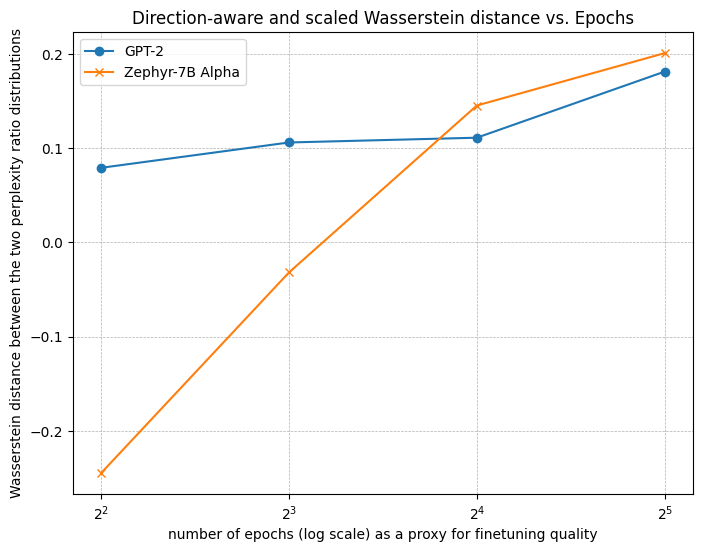

In [ ]:
n_epochs_arr = [4, 8, 16, 32]

wasserstein_dist_gpt2_arr = [dir_aw_scaled_wasp_gpt2_4ep, dir_aw_scaled_wasp_gpt2_8ep, dir_aw_scaled_wasp_gpt2_16ep, dir_aw_scaled_wasp_gpt2_32ep]
wasserstein_dist_zephyr_arr = [dir_aw_scaled_wasp_zephyr_4ep, dir_aw_scaled_wasp_zephyr_8ep, dir_aw_scaled_wasp_zephyr_16ep, dir_aw_scaled_wasp_zephyr_32ep]

import numpy as np
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_epochs_arr, wasserstein_dist_gpt2_arr, label='GPT-2', marker='o')
plt.plot(n_epochs_arr, wasserstein_dist_zephyr_arr, label='Zephyr-7B Alpha', marker='x')
plt.xscale('log', base=2)
plt.xlabel('number of epochs (log scale) as a proxy for finetuning quality')
plt.ylabel('Wasserstein distance between the two perplexity ratio distributions')
plt.title('Direction-aware and scaled Wasserstein distance vs. Epochs')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Define the directory path
directory_path = '/content/drive/My Drive/gpt2_perplexity_ratios'
plt.savefig(directory_path  + '/gpt2_and_zephyr__dir_aw_scaled_wasp_v_epochs.pdf')

plt.show()

# Plot separately

In [ ]:
n_epochs_arr = [4, 8, 16, 32]

wasserstein_dist_gpt2_arr = [dir_aw_scaled_wasp_gpt2_4ep, dir_aw_scaled_wasp_gpt2_8ep, dir_aw_scaled_wasp_gpt2_16ep, dir_aw_scaled_wasp_gpt2_32ep]
wasserstein_dist_zephyr_arr = [dir_aw_scaled_wasp_zephyr_4ep, dir_aw_scaled_wasp_zephyr_8ep, dir_aw_scaled_wasp_zephyr_16ep, dir_aw_scaled_wasp_zephyr_32ep]



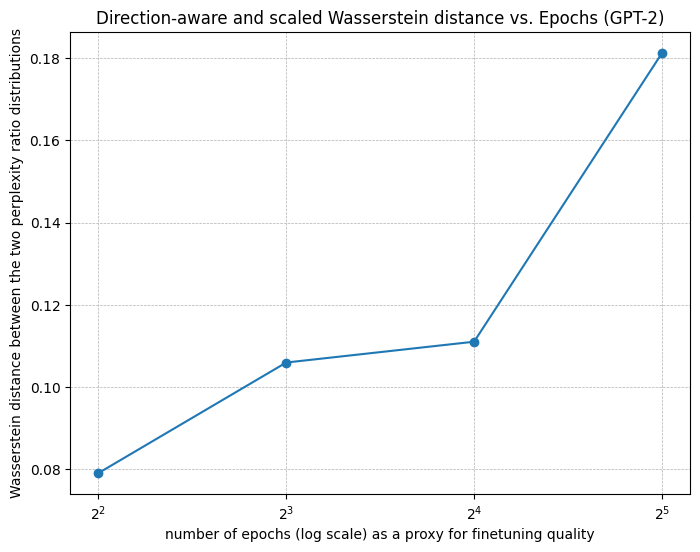

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_epochs_arr, wasserstein_dist_gpt2_arr, label='GPT-2', marker='o')
plt.xscale('log', base=2)
plt.xlabel('number of epochs (log scale) as a proxy for finetuning quality')
plt.ylabel('Wasserstein distance between the two perplexity ratio distributions')
plt.title('Direction-aware and scaled Wasserstein distance vs. Epochs (GPT-2)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Define the directory path
directory_path = '/content/drive/My Drive/gpt2_perplexity_ratios'
plt.savefig(directory_path  + '/gpt2__dir_aw_scaled_wasp_v_epochs.pdf')

plt.show()

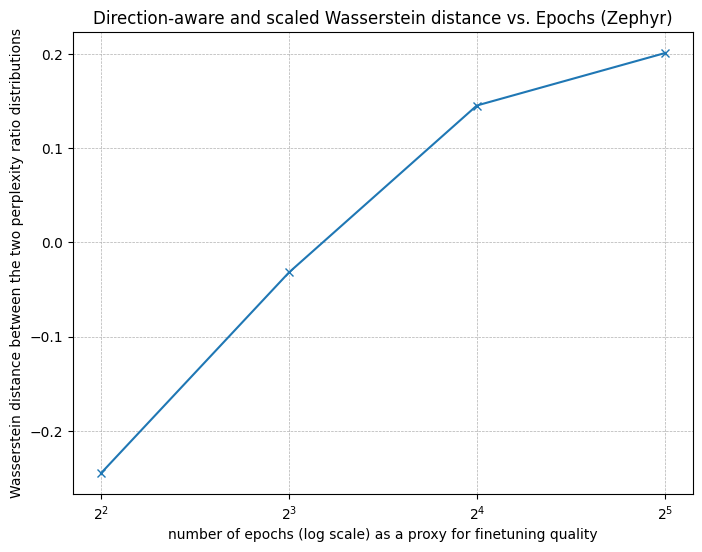

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_epochs_arr, wasserstein_dist_zephyr_arr, label='Zephyr-7B Alpha', marker='x')
plt.xscale('log', base=2)
plt.xlabel('number of epochs (log scale) as a proxy for finetuning quality')
plt.ylabel('Wasserstein distance between the two perplexity ratio distributions')
plt.title('Direction-aware and scaled Wasserstein distance vs. Epochs (Zephyr)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Define the directory path
directory_path = '/content/drive/My Drive/zephyr_perplexity_ratios'
plt.savefig(directory_path  + '/zephyr__dir_aw_scaled_wasp_v_epochs.pdf')

plt.show()